In [1]:
%pylab inline
import numpy as np
from scipy import stats
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.random.randn(100)

In [3]:
with pm.Model() as model: 
    mu = pm.Normal('mu', mu=0, sd=1, testval=0)
    sd = pm.HalfNormal('sd', sd=1)
    n = pm.Normal('n', mu=mu, sd=sd, observed=data)

Applied log-transform to sd and added transformed sd_log to model.


In [4]:
means, sds, elbos = pm.variational.advi(model=model, n=20000, accurate_elbo=True)

Iteration 0 [0%]: ELBO = -785.37
Iteration 2000 [10%]: Average ELBO = -416.12
Iteration 4000 [20%]: Average ELBO = -165.55
Iteration 6000 [30%]: Average ELBO = -146.29
Iteration 8000 [40%]: Average ELBO = -141.42
Iteration 10000 [50%]: Average ELBO = -140.72
Iteration 12000 [60%]: Average ELBO = -140.71
Iteration 14000 [70%]: Average ELBO = -140.71
Iteration 16000 [80%]: Average ELBO = -140.71
Iteration 18000 [90%]: Average ELBO = -140.71
Finished [100%]: Average ELBO = -140.71


In [5]:
with model:
    step = pm.NUTS()
    trace = pm.sample(500, step)

 [-----------------100%-----------------] 500 of 500 complete in 0.2 sec

In [6]:
print(trace['mu'].mean())
print(trace['sd_log'].mean())
print(trace['mu'].std())
print(trace['sd_log'].std())

0.00630037984074
-0.112134450899
0.0861106628944
0.0725504593946


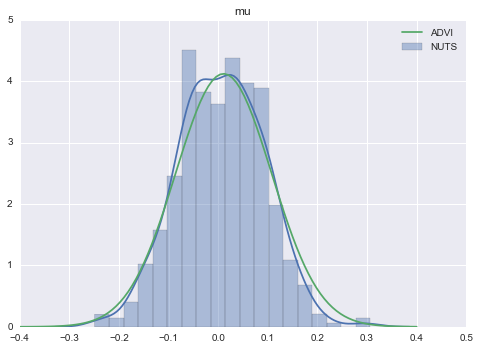

In [7]:
ax = sns.distplot(trace['mu'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['mu'], sds['mu']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('mu')
ax.legend(loc=0)

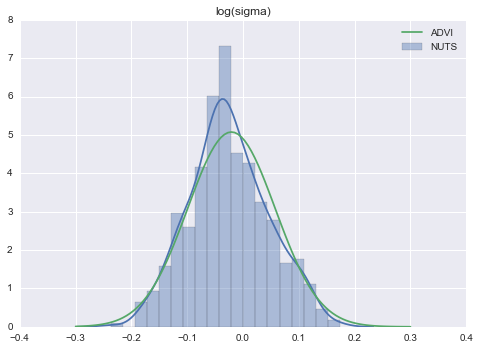

In [8]:
ax = sns.distplot(trace['sd_log'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['sd_log'], sds['sd_log']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('log(sigma)')
ax.legend(loc=0)

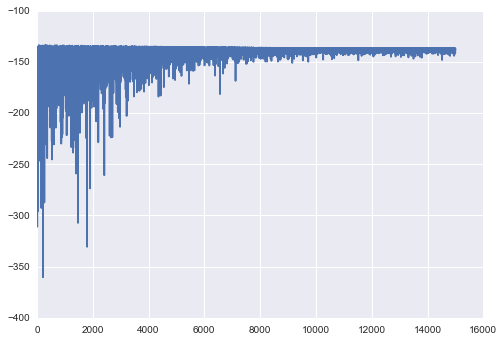

In [8]:
import matplotlib.pyplot as plt
plt.plot(elbos[5000:])